In [1]:
%pylab inline
from astropy import units
from astropy import constants
from cosmotools import rvir, concentration
from profiles import *
import os.path

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
# Constants
h = 0.7
H = 67.8 * units.km / units.s / units.Mpc
H_code = 3.2407789E-18  / units.s * 0.7
print H_code
print G, H.to(1/units.s)

2.26854523e-18 1 / s
4.51835939627e-39 kpc3 / (s2 solMass) 2.19724835826e-18 1 / s


Here we model of the MW, our first model is for a MW of mass $ M_{vir}=1E12 M\odot$.
The MW have a bulge a disk and dark matter halo:

- The MW Bulge have a mass of $M_b = 1E10 M\odot$ this is modeled with a 
Hernquist profile with scale length $r_b = 0.7 kpc$.

- The disk of the MW have a mass of $M_d = 6.5E10 M\odot$ and is modeled as ...

- The Dark Matter halo have a total mass of $M_h = M_{vir} - M_d - M_b$


$M_h = M_{vir} - M_b - M_d =  1E12 - 6.5E10 - 1E10 = 9.25E11 M\odot$

## MW dark matter halo model:

In [5]:
V = (9.25E11*units.Msun * H_code * G * sqrt(48.6) )**(1.0/3.0)
V = V.to(units.km/units.s)
R = V /(sqrt(48.6) * H_code)
print V, R.to(units.kpc)

124.761304185 km / s 255.660588058 kpc


In [4]:
MDisk = 6.5E10
MBulge = 1E10
Mvir = 1E12
MMW_halo = Mvir - MDisk - MBulge

def halo_properties(M):
    MW_halo_c = concentration(M)
    MW_halo_rvir = rvir(M, 0)
    R_H1 = MW_halo_rvir / MW_halo_c 
    return MW_halo_c, MW_halo_rvir, R_H1

In [5]:
Halo_c, Halo_rvir, Halo_rs = halo_properties(MMW_halo)
print Halo_c, Halo_rvir, Halo_rs
print MMW_halo

9.91809468574 255.827582235 kpc 25.7940249958 kpc
9.25e+11


In [6]:
def quicktest(v):
    v = v * units.km / units.s
    Mv = v**3 / (sqrt(48.6) * H_code * G)
    Mv = Mv.to(units.Msun) 
    Rv = v /(sqrt(48.6) * H_code)
    Rv = Rv.to(units.kpc) 
    return Mv, Rv

In [7]:
quicktest(124.76)

(<Quantity 924970992000.7775 solMass>, <Quantity 255.6579155248513 kpc>)

In [8]:
!python GalIC_input.py 1.415E12 294.7715 30.68

This code assume that your initial parameters are Mvir(NFW), Rvir(NFW) and Rs(NFW)
Vvir (NFW) 143.753405442 km / s
cvir(NFW) =  9.60793676662
c200(NFW) =  7.11546921214
a200 =  61.3065636584
avir =  63.6574906257
M200 =  1.18282813197e+12
M_h_200 =  1.94046866287e+12
M_h_vir =  2.09214468508e+12
v_h_200 =  180.120092529 km / s
v_h_vir =  163.768322389 km / s
a_200 Volker =  65.7998404337 kpc


In [11]:
M_halo_hern =  2.09214468508E12
a_halo = 63.6574906257

In [12]:
r10 = linspace(0, 10, 100)
r20 = linspace(0, 20, 100)
r30 = linspace(0, 30, 100)
r50 = linspace(0, 50, 100)
r100 = linspace(0, 100, 100)
r280 = linspace(0, 280, 100)

In [173]:
# Halo
teo_mass = mass_hernquist(a_halo ,r20, M_halo_hern)
teo_mass260 = mass_hernquist(a_halo ,r280, M_halo_hern)

teo_den = dens_hernquist(a_halo, r20, M_halo_hern)
teo_den260 = dens_hernquist(a_halo, r280, M_halo_hern)

teo_vc = vc_hernquist(a_halo, r20, 0, 0, M_halo_hern)
teo_vc30 = vc_hernquist(a_halo, r30, 0, 0, M_halo_hern)
teo_vc260 = vc_hernquist(a_halo, r280, 0, 0, M_halo_hern)
teo_vc260_volk = vc_hernquist(55.525, r280, 0, 0, M_halo_hern)

# Bulge 
Mbulge = 1E10
abulge = 0.7
teo_bulge_vc = vc_hernquist(abulge, r30, 0, 0, Mbulge)
teo_bulge_vc_280 = vc_hernquist(abulge, r280, 0, 0, Mbulge)

# Disk

Mdisk = 7.5E10
teo_disk_vc = vc_mn(2.5, 4.0/5.0 ,r30, 0, 0, Mdisk)
teo_disk_vc_280 = vc_mn(2.5, 3.5/5.0 ,r280, 0, 0, Mdisk)

# MW

teo_MW_vc = np.sqrt(teo_bulge_vc**2 + teo_disk_vc**2 + teo_vc**2)

In [174]:
# Models
#-----------------------------------------
M_chervin_halo = 92.94E10 / h # from lsf.out of GalIC 200
A_chervin_halo = 28.1096 / h  # 200
print "chervin = ", M_chervin_halo, A_chervin_halo

chervin =  1.32771428571e+12 40.1565714286


# Data from simulations

In [175]:
IC_chervin = loadtxt('../ICs/MW_models/MW1/chevin_rotcurve.txt', skiprows=1)
IC_MW = loadtxt('../ICs/MW_models/MW1/rotcurve.txt', skiprows=1)

In [176]:
#------------- chervin --------------------
r = IC_chervin[:,0] / h
vc_chervin_MW = IC_chervin[:,1]
vc_chervin_halo = IC_chervin[:,2]
vc_chervin_disk = IC_chervin[:,3]
vc_chervin_bulge = IC_chervin[:,4]

# ------------- Nico ---------------------
vc_MW_r = IC_MW[:,0] / h
vc_MW = IC_MW[:,1]
vc_MW_halo = IC_MW[:,2]
vc_MW_disk = IC_MW[:,3]
vc_MW_bulge = IC_MW[:,4]

(0, 255)

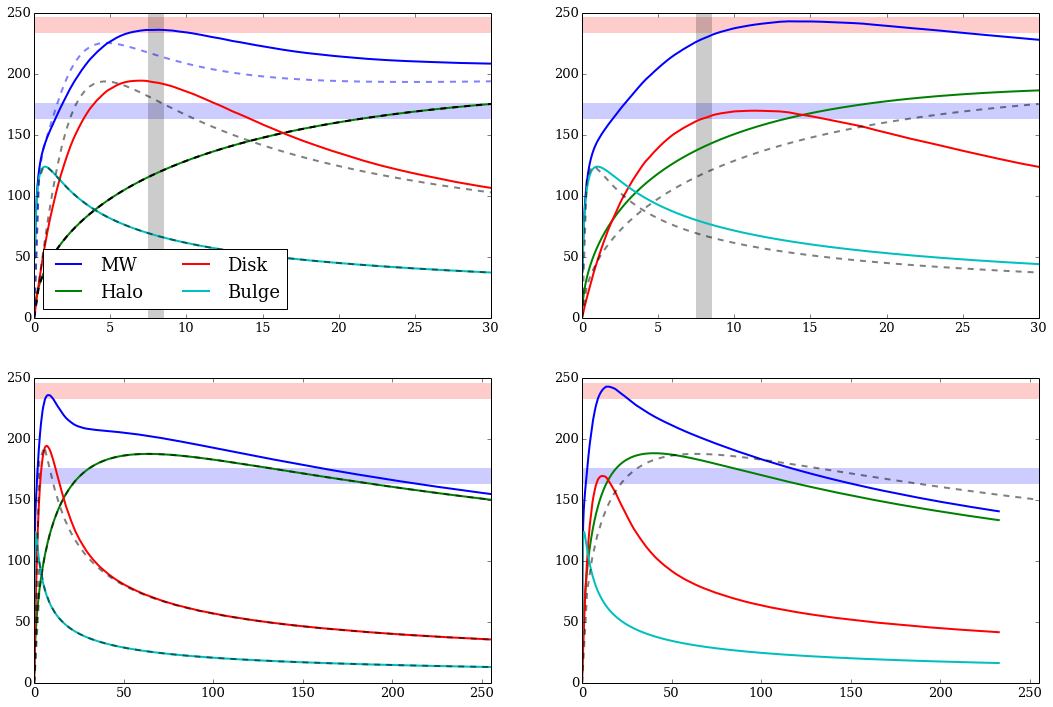

In [177]:
figure(figsize=(18, 12))

ax1 = subplot(2, 2, 1)
ax1.axhline(170, lw=16, alpha=0.2)
ax1.axhline(240, lw=16, alpha=0.2, c='r')
ax1.axvline(8, lw=16, alpha=0.2, c='k')
ax1.plot(vc_MW_r, vc_MW, lw=2, label='MW')
ax1.plot(vc_MW_r, vc_MW_halo, lw=2, label='Halo')
ax1.plot(vc_MW_r, vc_MW_disk, lw=2, label='Disk')
ax1.plot(vc_MW_r, vc_MW_bulge, lw=2, label='Bulge')
ax1.plot(r30, teo_vc30, c='k', ls='--', lw=2, alpha=1)
ax1.plot(r30, teo_bulge_vc, c='k', ls='--', lw=2, alpha=0.5)
ax1.plot(r30, teo_disk_vc, c='k', ls='--', lw=2, alpha=0.5)
ax1.plot(r30, teo_MW_vc, c='b', ls='--', lw=2, alpha=0.5)
ax1.legend(loc='best', fontsize=18, ncol=2)
xlim(0, 30)

ax2 = subplot(2, 2, 2)
ax2.axhline(170, lw=16, alpha=0.2)
ax2.axhline(240, lw=16, alpha=0.2, c='r')
ax2.axvline(8, lw=16, alpha=0.2, c='k')
ax2.plot(r, vc_chervin_MW, lw=2)
ax2.plot(r, vc_chervin_halo, lw=2)
ax2.plot(r, vc_chervin_disk, lw=2)
ax2.plot(r, vc_chervin_bulge, lw=2)
ax2.plot(r30, teo_vc30, c='k', ls='--', lw=2, alpha=0.5)
ax2.plot(r30, teo_bulge_vc, c='k', ls='--', lw=2, alpha=0.5)


xlim(0, 30)

ax3 = subplot(2, 2, 3)
ax3.axhline(170, lw=16, alpha=0.2)
ax3.axhline(240, lw=16, alpha=0.2, c='r')
ax3.plot(vc_MW_r, vc_MW, lw=2)
ax3.plot(vc_MW_r, vc_MW_halo, lw=2)
ax3.plot(vc_MW_r, vc_MW_disk, lw=2)
ax3.plot(vc_MW_r, vc_MW_bulge, lw=2)
ax3.plot(r280, teo_vc260, c='k', ls='--', lw=2, alpha=0.5)
ax3.plot(r280, teo_bulge_vc_280, c='k', ls='--', lw=2, alpha=0.5)
ax3.plot(r280, teo_disk_vc_280, c='k', ls='--', lw=2, alpha=0.5)


xlim(0, 255)

ax4 = subplot(2, 2, 4)
ax4.axhline(170, lw=16, alpha=0.2)
ax4.axhline(240, lw=16, alpha=0.2, c='r')
ax4.plot(r, vc_chervin_MW, lw=2)
ax4.plot(r, vc_chervin_halo, lw=2)
ax4.plot(r, vc_chervin_disk, lw=2)
ax4.plot(r, vc_chervin_bulge, lw=2)
ax4.plot(r280, teo_vc260, c='k', ls='--', lw=2, alpha=0.5)
xlim(0, 255)

In [127]:
# Disk Scale length:

def H_disk():
    H = 3.5 * 0.7 
    c = 9.91
    Rvir = 178.961
    fc = log(1.0 + c) - c / (1 + c)
    L = 2 * H * fc / (sqrt(2) * Rvir) 
    print sqrt(2) / 2.0 * Rvir / fc
    return L

In [33]:
H_disk()

85.425787979


0.028679864218548408

In [173]:
(85.425 * 0.0286) / 0.7

3.4902214285714286

In [101]:
mass_MW_NFW = mass_NFW(9.918, r280, 0, 0, 9.25E11)
dens_MW_NFW = dens_NFW(9.918, r280, 0, 0, 9.25E11) 

#mass_MW_chervin =  mass_hernquist(40.15, r,  1.327E12)

359.295478591 1.29448373621e+41 km2 solMass / (kpc3 Mpc2)


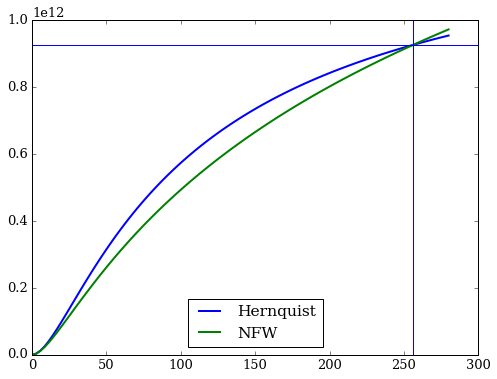

In [102]:
figure(figsize=(8, 6))
plot(r280, teo_mass260, label='Hernquist', lw=2)
plot(r280, mass_MW_NFW, label='NFW', lw=2)
#plot(r, mass_MW_chervin)
axvline(255.82)
axhline(9.25E11)
legend(loc='best')
savefig('../doc/MW_enclosedM.png', bbox_inches='tight')

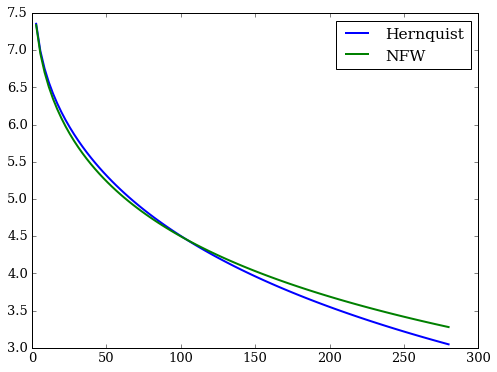

In [103]:
figure(figsize=(8, 6))
plot(r280, log10(teo_den260.value), label='Hernquist', lw=2)
plot(r280, log10(dens_MW_NFW.value), label='NFW', lw=2)
#plot(r, mass_MW_chervin)
#axvline(261)
#axhline(1E12)
legend(loc='best')
#rvir(1E12, 0)
savefig('../doc/MW_enclosedRho.png', bbox_inches='tight')